In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

!wget https://raw.githubusercontent.com/lauradiosan/AI-UBB/main/2023-2024/labs/lab02/data/employees.csv

--2024-03-22 11:21:38--  https://raw.githubusercontent.com/lauradiosan/AI-UBB/main/2023-2024/labs/lab02/data/employees.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59175 (58K) [text/plain]
Saving to: ‘employees.csv.3’

employees.csv.3     100%[===================>]  57.79K  --.-KB/s    in 0.008s  

2024-03-22 11:21:38 (7.32 MB/s) - ‘employees.csv.3’ saved [59175/59175]



1. Se cunosc date despre angajatii unei companii, date salvate in fisierul "data/employees.csv".

In [ ]:
%matplotlib inline

df_employees = pd.read_csv('employees.csv', delimiter=',', header='infer')
df_employees.head(9)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal
6,Ruby,Female,8/17/1987,4:20 PM,65476,10.012,True,Product
7,NaN,Female,7/20/2015,10:43 AM,45906,11.598,NaN,Finance
8,Angela,Female,11/22/2005,6:29 AM,95570,18.523,True,Engineering


a. Sa se stabileasca:
*   numarul de angajati



In [ ]:
number_of_employees = df_employees.shape[0]
print(f'Number of employees: {number_of_employees}')

Number of employees: 1000


* numarul si tipul informatiilor (proprietatilor) detinute pentru un angajat



In [ ]:
print(f'Number of properties: {df_employees.shape[1]}')

print(f'Info types:')
print(df_employees.dtypes)

Number of properties: 8
Info types:
First Name            object
Gender                object
Start Date            object
Last Login Time       object
Salary                 int64
Bonus %              float64
Senior Management     object
Team                  object
dtype: object


* numarul de angajati pentru care se detin date complete


In [ ]:
number_of_complete_data = number_of_employees - df_employees.isnull().any(axis=1).sum()
print(f'Number of employees with complete data: {number_of_complete_data}')

Number of employees with complete data: 764


* valorile minime, maxime, medii pentru fiecare proprietate

In [ ]:
import pandas as pd

df_mapped = df_employees.copy()

for col in df_mapped.columns:
    if df_mapped[col].dtype == 'object':
        unique_values = df_mapped[col].dropna().unique()
        mapping = {value: index + 1 for index, value in enumerate(unique_values)}
        df_mapped[col] = df_mapped[col].map(mapping)

mean_values = pd.Series(index=df_employees.columns)

for col in df_employees.columns:
  print(f'For {col}')

  if df_employees[col].dtypes in ['int64', 'float64']:
    min_value = df_mapped[col].min()
    max_value = df_mapped[col].max()
    mean_value = df_mapped[col].mean()

    mean_values[col] = mean_value

    print(f'Min value: {min_value}')
    print(f'Max value: {max_value}')
    print(f'Mean value: {mean_value}')

  else:
    freq = df_mapped[col].value_counts()

    min_value = freq[freq == freq.min()].idxmin()
    max_value = freq[freq == freq.max()].idxmin()
    mean_value = df_mapped[col].mean()

    min_idx = df_mapped[df_mapped[col] == min_value].index[0]
    max_idx = df_mapped[df_mapped[col] == max_value].index[0]
    mean_idx = df_mapped[df_mapped[col] == round(mean_value)].index[0]

    mean_values[col] = df_employees[col][mean_idx]

    print(f'Min value: {df_employees[col][min_idx]}')
    print(f'Max value: {df_employees[col][max_idx]}')
    print(f'Mean value: {df_employees[col][mean_idx]}')

  print()

For First Name
Min value: Eugene
Max value: Marilyn
Mean value: William

For Gender
Min value: Male
Max value: Female
Mean value: Female

For Start Date
Min value: 10/30/2009
Max value: 10/30/1994
Mean value: 4/9/2012

For Last Login Time
Min value: 9:51 AM
Max value: 1:35 PM
Mean value: 3:08 PM

For Salary
Min value: 35013
Max value: 149908
Mean value: 90662.181

For Bonus %
Min value: 1.015
Max value: 19.944
Mean value: 10.207555000000001

For Senior Management
Min value: False
Max value: True
Mean value: True

For Team
Min value: Legal
Max value: Client Services
Mean value: Product



<ipython-input-6-cfec8c4a0e0d>:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  mean_values = pd.Series(index=df_employees.columns)


* in cazul proprietatilor nenumerice, cate valori posibile are fiecare astfel de proprietate

In [ ]:
for col in df_employees:
  print(f'Number of possible values for column {col}:')
  print(len(df_employees[col].unique()))

  print()

Number of possible values for column First Name:
201

Number of possible values for column Gender:
3

Number of possible values for column Start Date:
972

Number of possible values for column Last Login Time:
720

Number of possible values for column Salary:
995

Number of possible values for column Bonus %:
971

Number of possible values for column Senior Management:
3

Number of possible values for column Team:
11



* daca sunt valori lipsa si cum se poate rezolva aceasta problema

In [ ]:
print(f'There are {df_employees.isnull().sum().sum()} null values')

for col in df_employees.columns:
  for idx in df_employees.index:
    if pd.isnull(df_employees.loc[idx, col]):
      df_employees.loc[idx, col] = mean_values[col]

print(f'There are {df_employees.isnull().sum().sum()} null values')

There are 322 null values
There are 0 null values


b. Sa se vizualizeze:
  * distributia salariilor acestor angajati pe categorii de salar

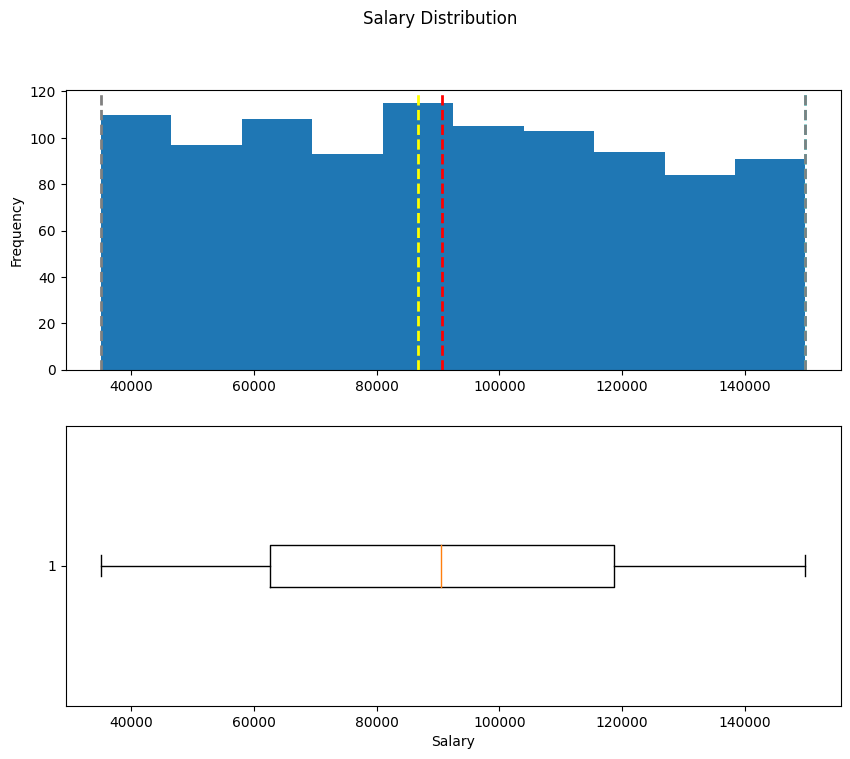

In [ ]:
var_data = df_employees['Salary']

min_val = var_data.min()
max_val = var_data.max()
mean_val = var_data.mean()
med_val = var_data.median()
mod_val = var_data.mode()[0]

fig, ax = plt.subplots(2, 1, figsize = (10, 8))

ax[0].hist(var_data)
ax[0].set_ylabel('Frequency')

ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth=2)
ax[0].axvline(x=max_val, color = 'cyan', linestyle='dashed', linewidth=2)
ax[0].axvline(x=mean_val, color = 'red', linestyle='dashed', linewidth=2)
ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth=2)
ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth=2)

ax[1].boxplot(var_data, vert=False)
ax[1].set_xlabel('Salary')

fig.suptitle('Salary Distribution')

fig.show()

* distributia salariilor acestor angajati pe categorii de salar si echipa din care fac parte

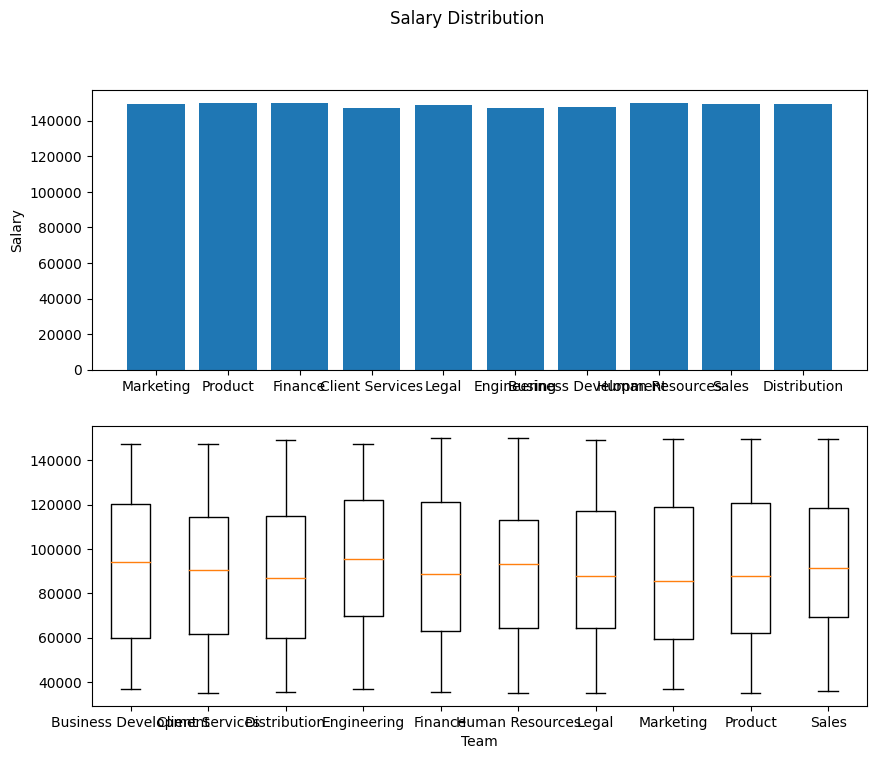

In [ ]:
var_data = df_employees['Salary']

fig, ax = plt.subplots(2, 1, figsize = (10, 8))

ax[0].bar(x=df_employees.Team, height=df_employees.Salary)
ax[0].set_ylabel('Salary')

grouped_salaries = df_employees.groupby('Team')['Salary'].apply(list)
ax[1].boxplot(grouped_salaries.values, labels=grouped_salaries.index)
ax[1].set_xlabel('Team')

fig.suptitle('Salary Distribution')

fig.show()

* angajatii care pot fi considerati "outlieri"

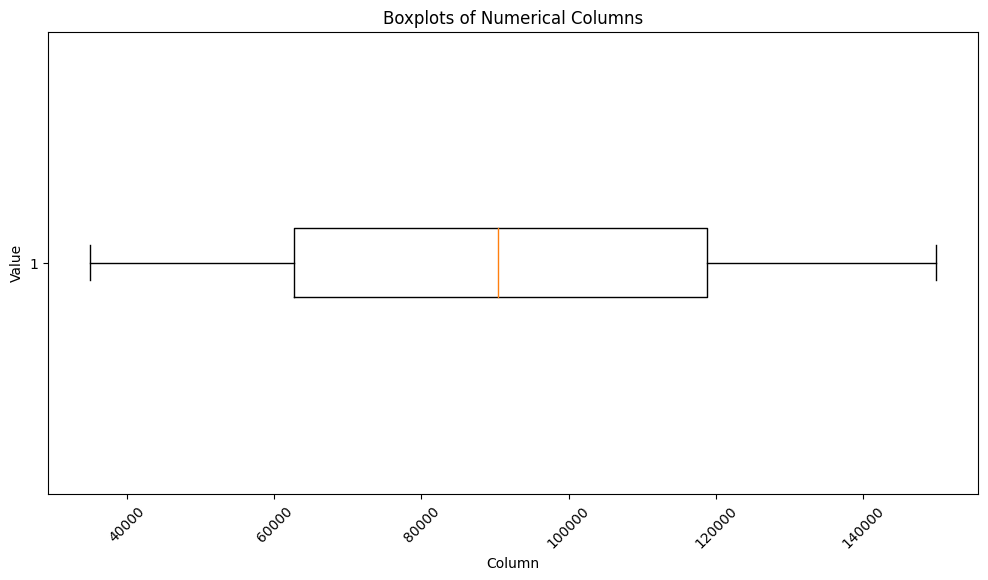

In [ ]:
plt.figure(figsize=(12, 6))
plt.boxplot(var_data, vert=False)
plt.title('Boxplots of Numerical Columns')
plt.xlabel('Column')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()


2. Se dau mai multe imagini (salvate in folder-ul "data/images"). Se cere:

In [ ]:
# Download the ZIP file containing only the images folder
!wget -O /content/images.zip https://github.com/lauradiosan/AI-UBB/archive/refs/heads/main.zip

# Unzip the images folder directly into /content
!unzip -q /content/images.zip -d /content/images

# Move the contents of the images folder to /content
!mv /content/images/AI-UBB-main/2023-2024/labs/lab02/data/images/* /content/images

# Remove the now empty extracted directory
!rm -r /content/images/AI-UBB-main

# Remove the downloaded ZIP file
!rm /content/images.zip

# List files in the /content directory
!ls /content/images


--2024-03-22 11:21:45--  https://github.com/lauradiosan/AI-UBB/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/lauradiosan/AI-UBB/zip/refs/heads/main [following]
--2024-03-22 11:21:45--  https://codeload.github.com/lauradiosan/AI-UBB/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.113.10
Connecting to codeload.github.com (codeload.github.com)|140.82.113.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/content/images.zip’

/content/images.zip     [           <=>      ] 102.23M  21.2MB/s    in 4.8s    

2024-03-22 11:21:51 (21.2 MB/s) - ‘/content/images.zip’ saved [107196134]

Altman.webp  chatGPT.png	 Karpaty.jpg  Leskovec.jpg  Norvig.jpg	 Turing.webp
BERT.png     diffusionModel.jpg  LeCun.jpg    Ng

In [ ]:
pip install scikit-image

In [ ]:
import matplotlib.pyplot as plt
from skimage import exposure, io
from skimage.feature import hog
import os
import random
from PIL import Image, ImageFilter

* sa se vizualizeze una din imagini

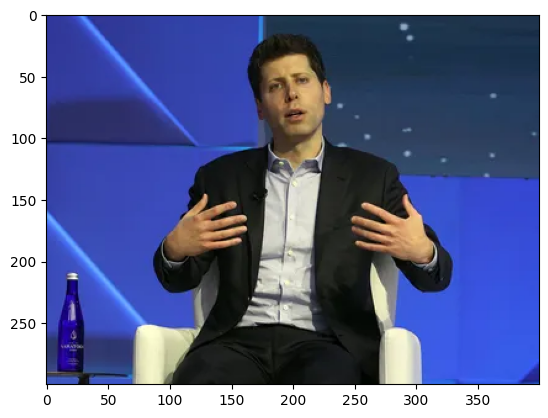

In [ ]:
crt_dir = os.getcwd()
file_path = os.path.join(crt_dir, 'images')

images = os.listdir(file_path)

image_path = os.path.join(crt_dir, 'images', random.choice(images))
img = io.imread(image_path)

plt.imshow(img)

plt.show()

* daca imaginile nu aceeasi dimensiune, sa se redimensioneze toate la 128 x 128 pixeli si sa se vizualizeze imaginile intr-un cadru tabelar.

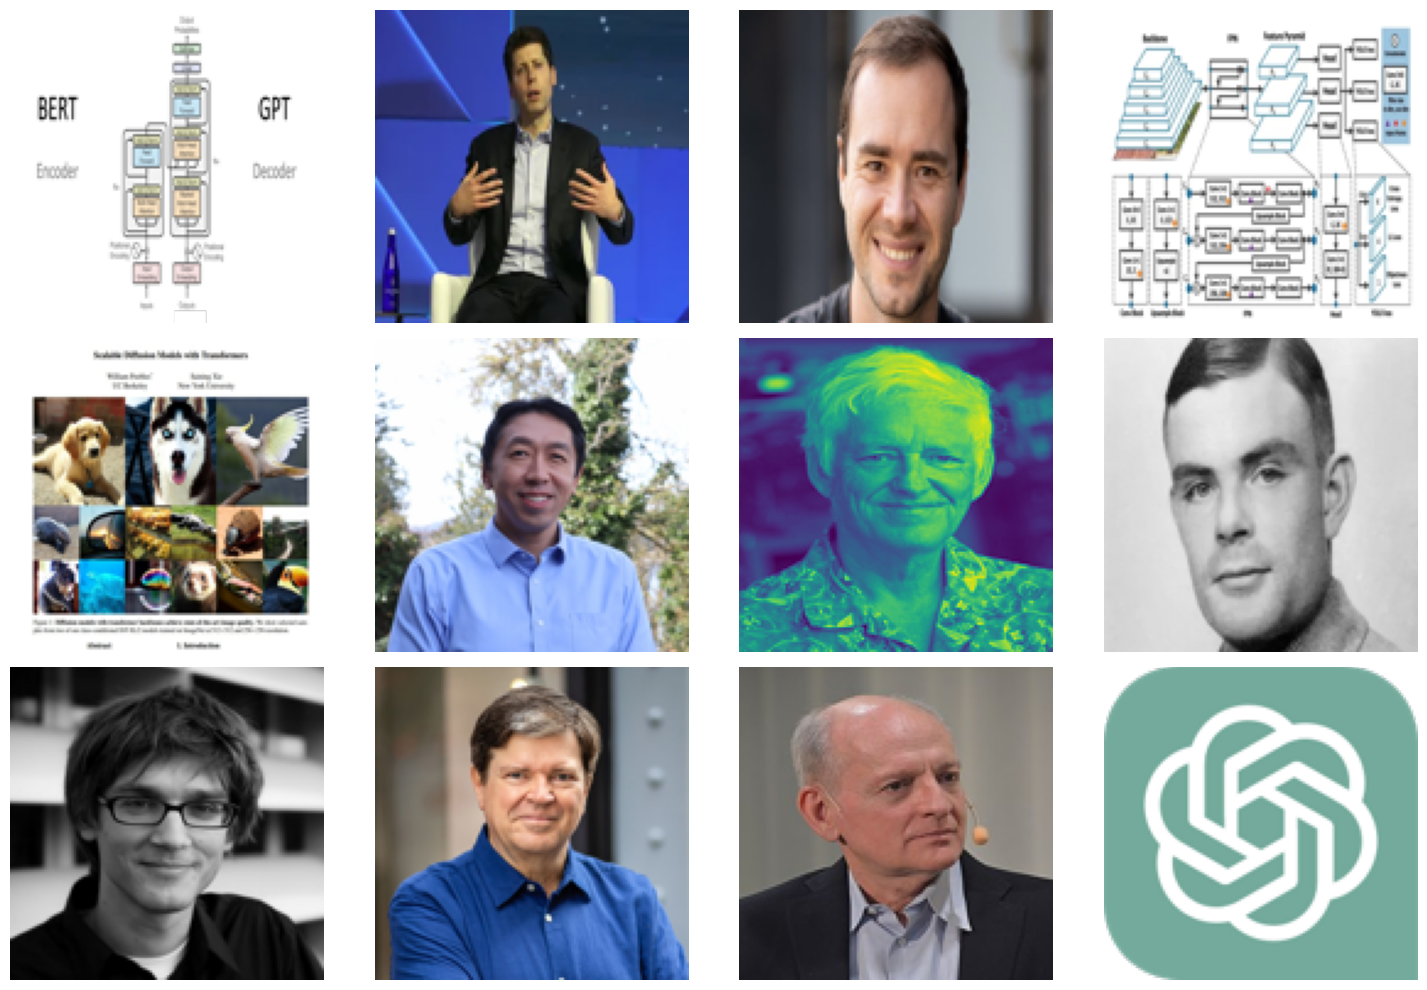

In [ ]:
resized_images = []
for image in images:
  image_path = os.path.join(file_path, image)
  img = Image.open(image_path)

  resized_img = img.resize((128, 128))

  resized_images.append(resized_img)

fig, axs = plt.subplots(3, 4, figsize=(15, 10))

for i, ax in enumerate(axs.flat):
    if i < len(resized_images):
        ax.imshow(resized_images[i])
        ax.axis("off")
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()

- sa se transforme imaginile in format gray-levels si sa se vizualizeze

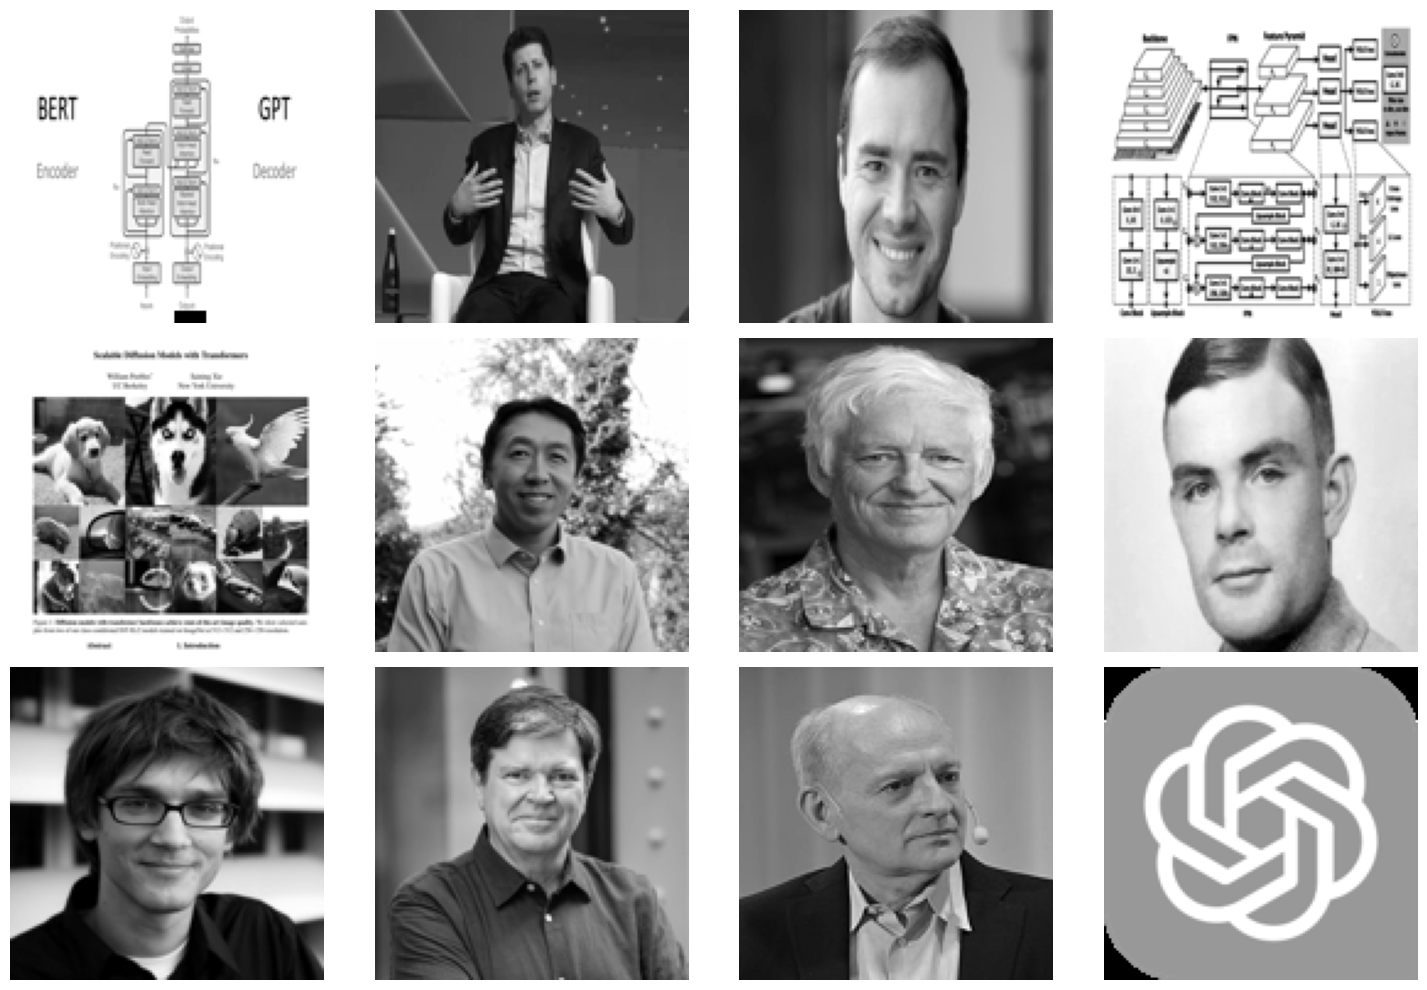

In [ ]:
gray_images = []
for img in resized_images:
  gray_img = img.convert('L')

  gray_images.append(gray_img)

fig, axs = plt.subplots(3, 4, figsize=(15, 10))

for i, ax in enumerate(axs.flat):
    if i < len(gray_images):
        ax.imshow(gray_images[i], cmap=plt.cm.gray)
        ax.axis("off")
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()

- sa se blureze o imagine si sa se afiseze in format "before-after"

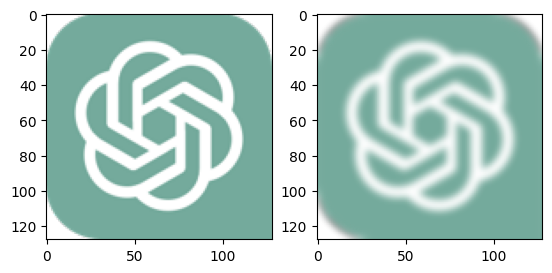

In [ ]:
fig, axs = plt.subplots(1, 2)

axs[0].imshow(img)
axs[1].imshow(img.filter(ImageFilter.GaussianBlur(radius=2)))

plt.show()

- sa se identifice muchiile ontr-o imagine si sa se afiseze in format "before-after"

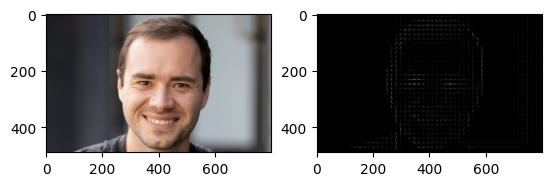

In [ ]:
fig, axs = plt.subplots(1, 2)

image_path = os.path.join(file_path, "Karpaty.jpg")
img = Image.open(image_path)

hogDescriptor, hogView = hog(img.convert('L'), orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, channel_axis=None)

axs[0].imshow(img)
axs[1].imshow(hogView, cmap=plt.cm.gray)

plt.show()

3. Se da un fisier care contine un text (format din mai multe propozitii) in limba romana - a se vedea fisierul ”data/texts.txt”. Se cere sa se determine si sa se vizualizeze:

In [ ]:
!wget https://raw.githubusercontent.com/lauradiosan/AI-UBB/main/2023-2024/labs/lab02/data/texts.txt

--2024-03-22 11:22:15--  https://raw.githubusercontent.com/lauradiosan/AI-UBB/main/2023-2024/labs/lab02/data/texts.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1095 (1.1K) [text/plain]
Saving to: ‘texts.txt.3’

texts.txt.3         100%[===================>]   1.07K  --.-KB/s    in 0s      

2024-03-22 11:22:15 (31.8 MB/s) - ‘texts.txt.3’ saved [1095/1095]



In [ ]:
pip install nltk

In [ ]:
!rm -r /content/nltk_data

In [ ]:
import nltk
import os

# Specifică calea către noul director de date NLTK
custom_nltk_data_path = "/content/nltk_data"

# Adaugă calea la lista de căi de căutare a resurselor NLTK
nltk.data.path.append(custom_nltk_data_path)

nltk.download('punkt', download_dir=custom_nltk_data_path)

nltk.download('punkt/PY3/romanian.pickle', quiet=True)


[nltk_data] Downloading package punkt to /content/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Error loading punkt/PY3/romanian.pickle: Package
[nltk_data]     'punkt/PY3/romanian.pickle' not found in index


False

In [ ]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [ ]:
!pip install unidecode

In [ ]:
!pip install PyDictionary

In [ ]:
!pip install rowordnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 11.0 MB/s eta 0:00:00


In [ ]:
from nltk.tokenize import sent_tokenize
import string
import unidecode
from PyDictionary import PyDictionary
from google.cloud import translate_v2 as translate
from nltk.corpus import wordnet
import spacy
import rowordnet

- numarul de propozitii din text;

In [ ]:
filename = "texts.txt"

with open(filename, "r") as file:
  text = file.read()

sentences = sent_tokenize(text, language='english')

num_sentences = len(sentences)

print('The number of sentences is: ', num_sentences)

The number of sentences is:  10


- numarul de cuvinte din text

In [ ]:
words = nltk.tokenize.word_tokenize(text, language='english')

words = [word for word in words if word.isalnum()]

num_words = len(words)

print('The number of words is: ', num_words)

The number of words is:  156


- numarul de cuvinte diferite din text

In [ ]:
unique_words = set(words)
num_unique_words = len(unique_words)

print('The number of unique words: ', num_unique_words)

The number of unique words:  94


- cel mai scurt si cel mai lung cuvant (cuvinte)

In [ ]:
words = [word.lower() for word in words]

shortest_word = min(words, key=len)
longest_word = max(words, key=len)

print('The shortest word: ', shortest_word)
print('The longest word: ', longest_word)

The shortest word:  o
The longest word:  laboratoarele


- textul fara diacritice

In [ ]:
no_diacritics = unidecode.unidecode(text)

print('Text without diacritics: ')
print(no_diacritics)

Text without diacritics: 
Mesaj de informare: 
Cursul si laboratoarele de Inteligenta Artificiala vor fi o 
provocare pentru toti. Suntem convinsi ca veti realiza proiecte 
foarte interesante. Va incurajam sa adresati intrebari atunci 
cand ceva nu e clar, atat in mod live, cat si folosind platforma 
Teams, canalul "general". 
Daca ati citit pana aici, va rugam sa lasati un mesaj pe canalul 
general cu textul "Am citit textul pentru problema 3". 
Mesaj de informare generat de ChatGPT:
Stimati cursanti,
Suntem incantati sa va avem in echipa noastra pentru Cursul si 
laboratoarele de Inteligenta Artificiala. Aceasta experienta va 
fi o adevarata provocare, dar suntem convinsi ca veti realiza 
proiecte extrem de interesante.
Va incurajam sa fiti activi si sa adresati intrebari atunci cand 
ceva nu este clar. Fie ca este vorba de o discutie in timp real 
sau prin intermediul platformei Teams, canalul "general", suntem 
aici sa va sprijinim.
Succes si sa inceapa aventura AI!
Cu consideratie

- sinonimele celui mai lung cuvant din text

In [ ]:
!python -m spacy download ro_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 24.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ro_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nltk.download('rowordnet')

[nltk_data] Error loading rowordnet: Package 'rowordnet' not found in
[nltk_data]     index


False

In [ ]:
nlp = spacy.load('ro_core_news_sm')
doc = nlp(longest_word)

longest_word_lemma = [token.lemma_ for token in doc]

wn = rowordnet.RoWordNet()
synonyms = []
synsets_id = wn.synsets()
for synset_id in synsets_id:
    synset = wn(synset_id)
    literals = list(synset.literals)

    for i in range(len(literals)):
        for j in range(i + 1, len(literals)):
            synonyms.append((literals[i], literals[j]))

for synonym in synonyms:
  if longest_word_lemma[0] == synonym[0]:
    print(synonym[1])
  elif longest_word_lemma[0] == synonym[1]:
    print(synonym[0])

poligon_de_încercare
laborator_de_cercetare
laborator_de_științe


4. Sa se normalizeze informatiile de la problema 1 si 2 folosind diferite metode de normalizare astfel:

In [ ]:
import math
import os
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from nltk import word_tokenize, sent_tokenize
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import numpy as np
from PIL import Image

- problema 1 - salariul, bonusul




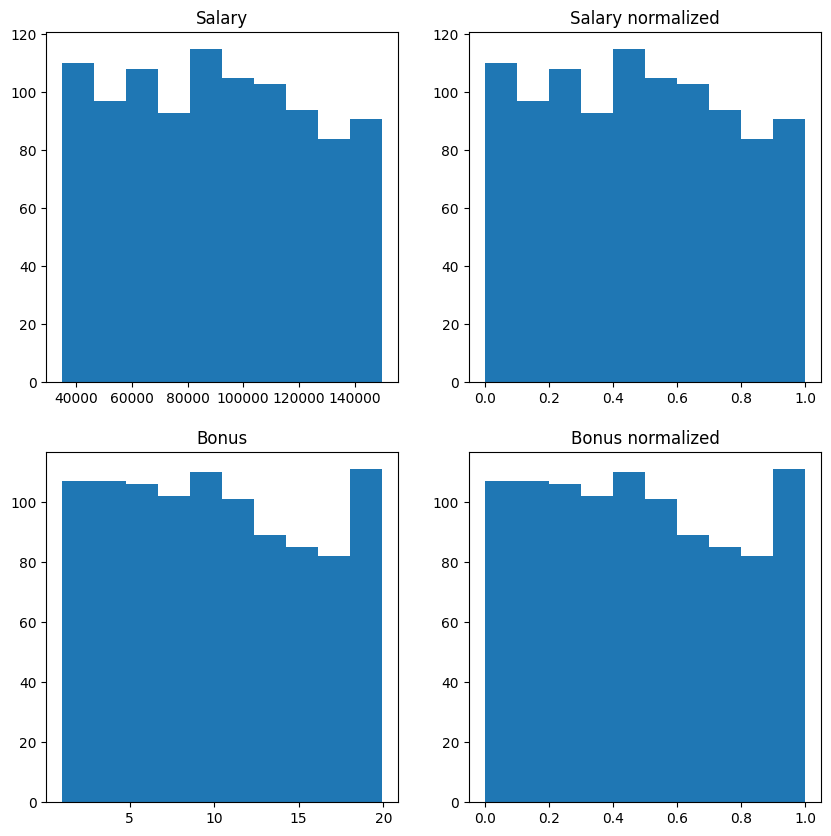

In [ ]:
df_employees = pd.read_csv('employees.csv', delimiter=',')
salaries = df_employees['Salary']
bonuses = df_employees['Bonus %']

scaler = MinMaxScaler()
salaries_scaled = scaler.fit_transform(pd.DataFrame(salaries))
bonuses_scaled = scaler.fit_transform(pd.DataFrame(bonuses))

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].hist(salaries)
axs[0, 0].set_title('Salary')

axs[0, 1].hist(salaries_scaled)
axs[0, 1].set_title('Salary normalized')

axs[1, 0].hist(bonuses)
axs[1, 0].set_title('Bonus')

axs[1, 1].hist(bonuses_scaled)
axs[1, 1].set_title('Bonus normalized')

plt.show()

- problema 2 - valorile pixelilor din imagini

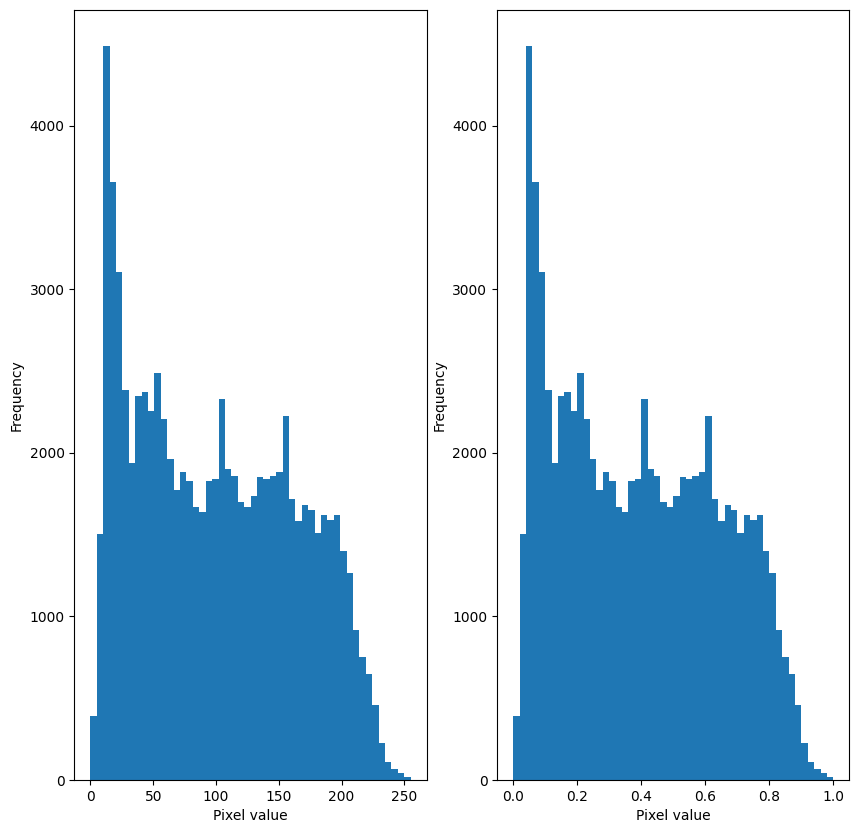

In [ ]:
img = Image.open('/content/images/Norvig.jpg').convert('L')
pixels = np.array(img)

norm_pixels = pixels / 255.0

fig, axs = plt.subplots(1, 2, figsize=(10, 10))

axs[0].hist(pixels.flatten(), bins=50)
axs[0].set_xlabel('Pixel value')
axs[0].set_ylabel('Frequency')

axs[1].hist(norm_pixels.flatten(), bins=50)

axs[1].set_xlabel('Pixel value')
axs[1].set_ylabel('Frequency')

plt.show()

- problema 3 - numarul de aparitii a cuvintelor la nivelul unei propozitii.

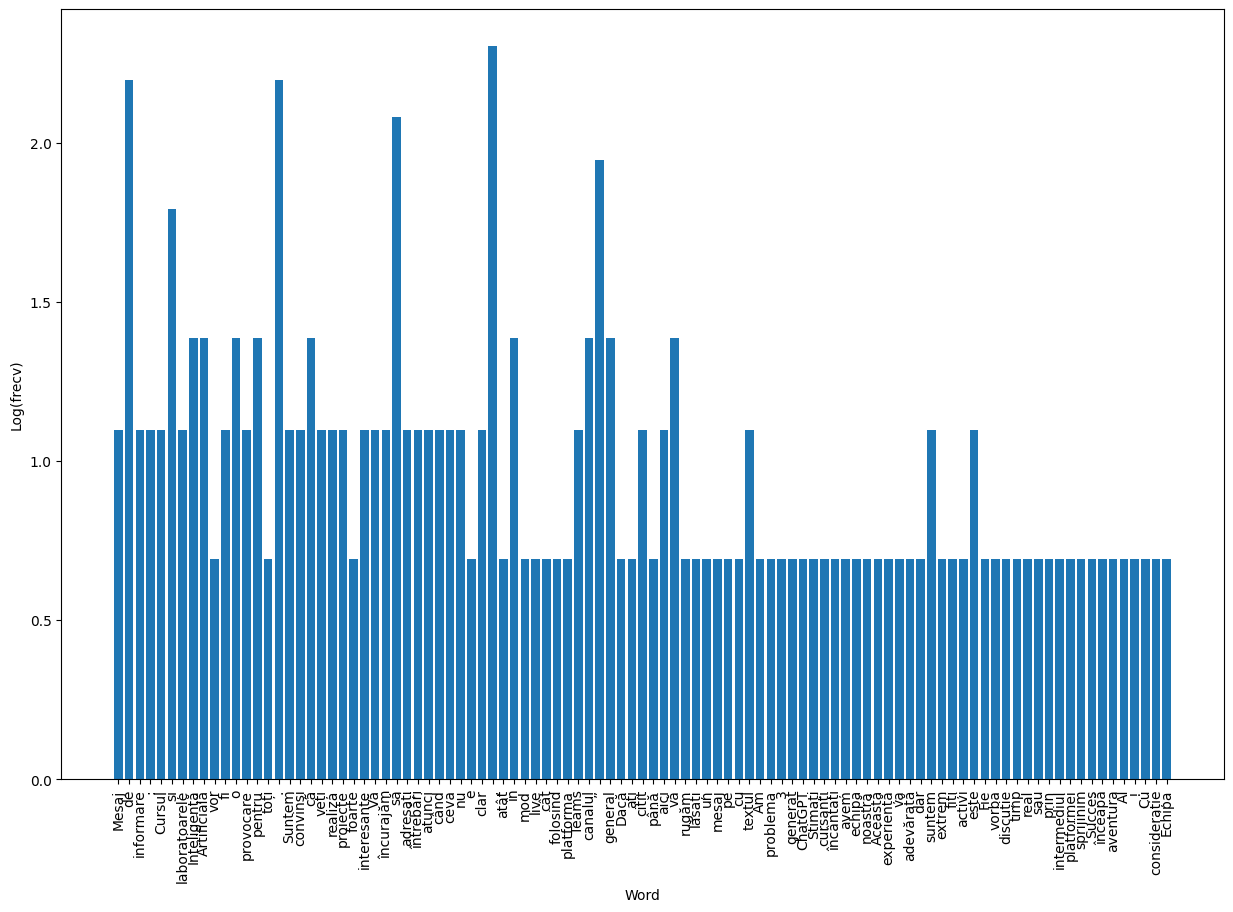

In [ ]:
with open('/content/texts.txt', "r") as file:
  text = file.read()

sentences = sent_tokenize(text)

frequencies = {}

for sentence in sentences:
  words = word_tokenize(sentence)
  for word in words:
      frequencies[word] = frequencies.get(word, 0) + 1

log_frequencies = {word: math.log(frequency + 1) for word, frequency in frequencies.items()}

plt.bar(log_frequencies.keys(), log_frequencies.values())

plt.gcf().set_size_inches(15, 10)

plt.xlabel('Word')
plt.xticks(rotation=90)
plt.ylabel('Log(frecv)')

plt.show()